In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import getdist
from getdist import plots, loadMCSamples

%matplotlib inline

## Import the chain and add some derived parameters

In [2]:
path = Path("chains/vanilla/full_dr14_paper.txt")
posterior = loadMCSamples(str(path)[:-4])

In [3]:
post_mod = posterior.copy()
p = post_mod.getParams()

post_mod.addDerived(1000 * p.bias_eta_sii_1/ 0.5, name='bias_sii_1', label=r'10^3 b_{SiII(1190)}')
post_mod.addDerived(1000 * p.bias_eta_sii_2/ 0.5, name='bias_sii_2', label=r'10^3 b_{SiII(1193)}')
post_mod.addDerived(1000 * p.bias_eta_siii/ 0.5, name='bias_siii', label=r'10^3 b_{SiIII(1207)}')
post_mod.addDerived(1000 * p.bias_eta_sii_3/ 0.5, name='bias_sii_3', label=r'10^3 b_{SiII(1260)}')
post_mod.addDerived(1000 * p.bias_eta_civ/ 0.27, name='bias_civ', label=r'10^3 b_{CIV(eff)}')

## Plots for the paper showing the correlations between $\alpha_{||}$, $\alpha_{\bot}$ and all the other parameters

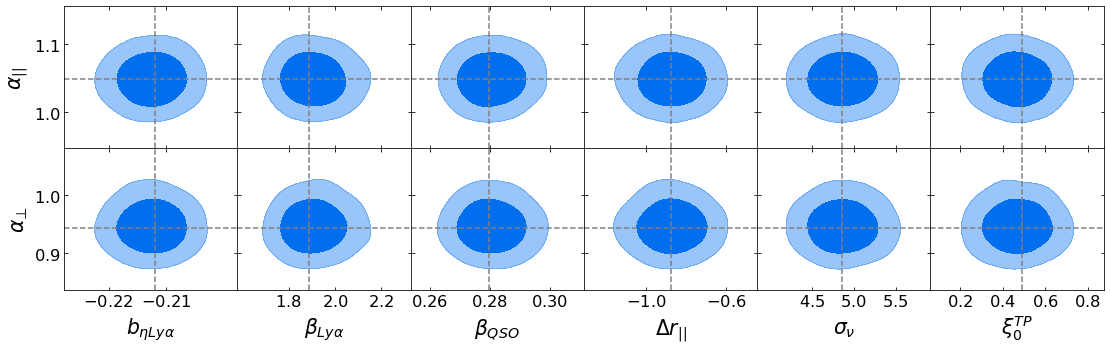

In [4]:
plt.rcParams['font.size'] = 22
g = getdist.plots.getSubplotPlotter(width_inch = 16, rc_sizes=True)
g.settings.axes_fontsize = 18
g.rectangle_plot(['bias_eta_LYA', 'beta_LYA', 'beta_qso',  'drp', 'sigma_nu', 'qso_rad_strength'], ['ap', 'at'],
                 roots=[post_mod], filled=True);

alphas = [1.04949, 0.94387]
paper_res = [-0.212, 1.887, 0.2798, -0.875, 4.859, 0.4888]

for ax in g.subplots[0,:]:
    ax.axhline(alphas[0], color='gray', ls='--')
    
for ax in g.subplots[1,:]:
    ax.axhline(alphas[1], color='gray', ls='--')

for i, res in enumerate(paper_res):
    for ax in g.subplots[:,i]:
        ax.axvline(res, color='gray', ls='--')

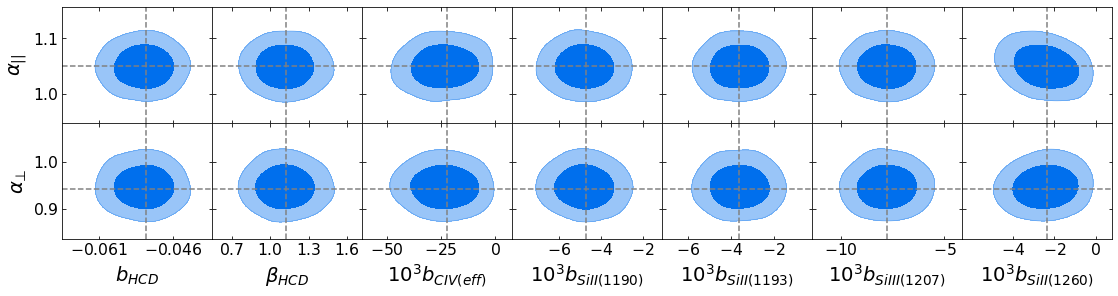

In [5]:
plt.rcParams['font.size'] = 22
g = getdist.plots.getSubplotPlotter(width_inch = 16, rc_sizes=True)
g.settings.axes_fontsize = 18
g.rectangle_plot(['bias_hcd_lya', 'beta_hcd', 'bias_civ', 'bias_sii_1', 'bias_sii_2', 'bias_siii', 'bias_sii_3'], ['ap', 'at'],
                 roots=[post_mod], filled=True);

alphas = [1.049, 0.942]
paper_res = [-0.0515, 1.1196, -0.006*10**3/0.27, -0.00236*10**3/0.5, -0.001818*10**3/0.5, -0.003897*10**3/0.5, -0.00119*10**3/0.5]

for ax in g.subplots[0,:]:
    ax.axhline(alphas[0], color='gray', ls='--')
    
for ax in g.subplots[1,:]:
    ax.axhline(alphas[1], color='gray', ls='--')

for i, res in enumerate(paper_res):
    for ax in g.subplots[:,i]:
        ax.axvline(res, color='gray', ls='--')

## The full posterior

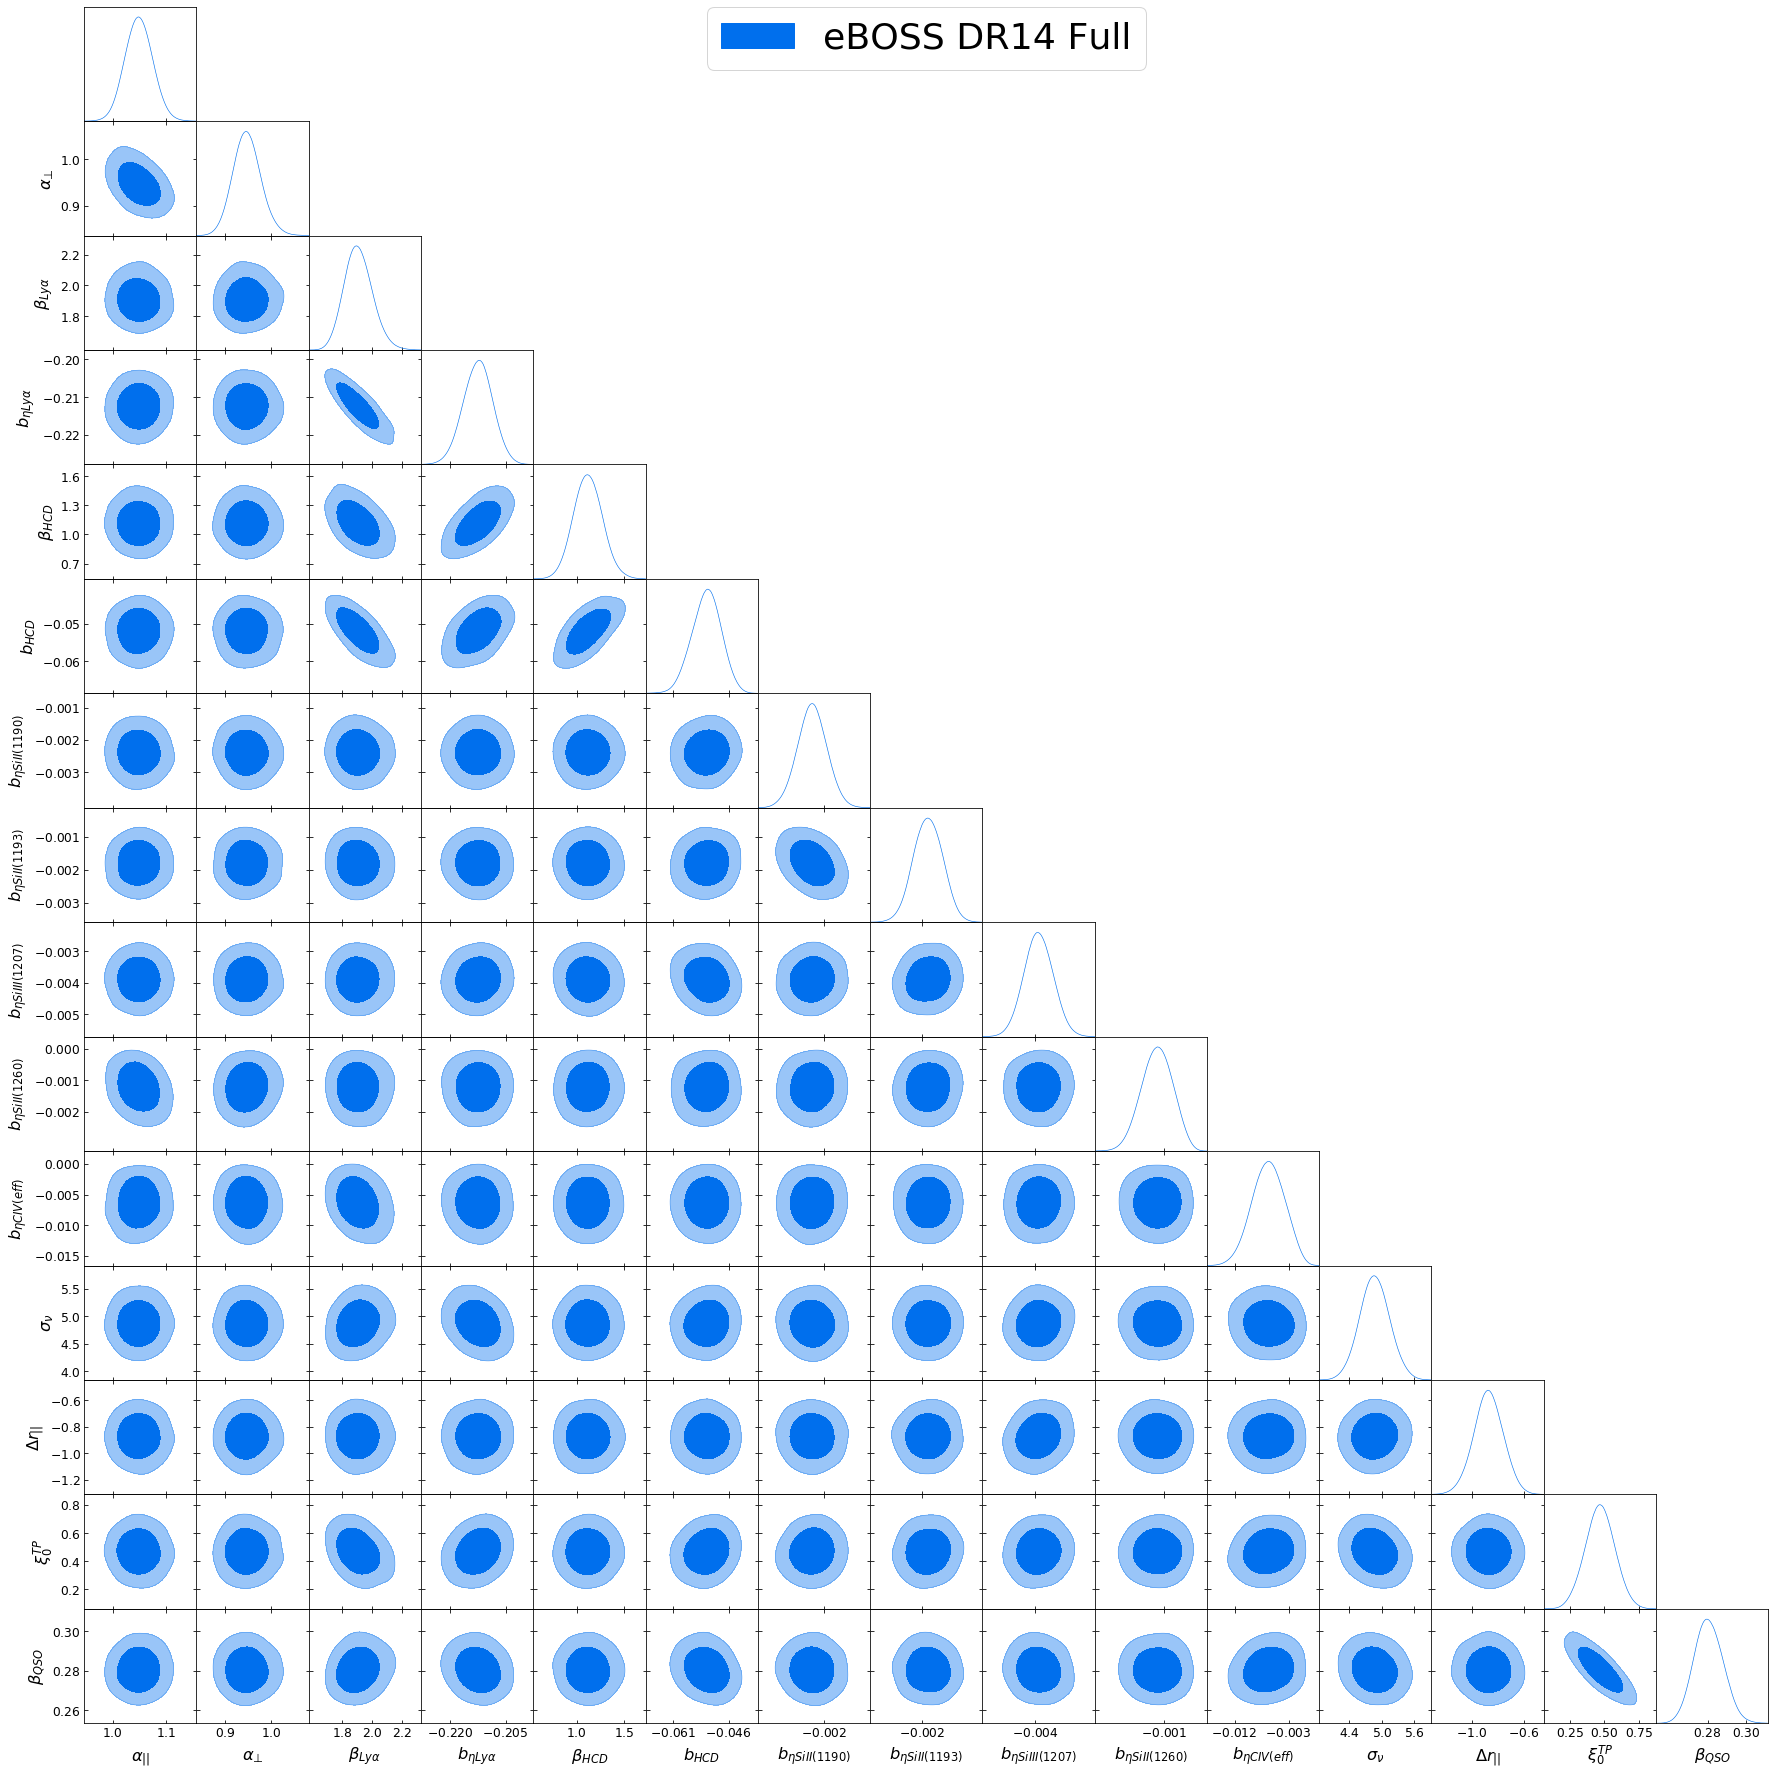

In [6]:
plt.rcParams['font.size'] = 18
g = getdist.plots.getSubplotPlotter(width_inch=25)
g.settings.fontsize = 24
g.settings.legend_fontsize = 40
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20

g.triangle_plot([post_mod], ['ap','at','beta_LYA','bias_eta_LYA', 'beta_hcd','bias_hcd_lya',
                              'bias_eta_sii_1','bias_eta_sii_2','bias_eta_siii', 'bias_eta_sii_3','bias_eta_civ',
                             'sigma_nu', 'drp', 'qso_rad_strength', 'beta_qso'],
           filled=True, legend_labels=[r'eBOSS DR14 Full'])